<a href="https://colab.research.google.com/github/Suhail-46/Shopper-Spectrum-Segmentation-and-Recommendations/blob/main/Shopper_Spectrum_Segmentation_and_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pushing the .csv file into data frame as 'df'
import pandas as pd
df = pd.read_csv("/content/online_retail.csv")

In [2]:
# View of converted data frame
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [3]:
# Shape of data frame to check count of rows and column
df.shape

(541909, 8)

In [4]:
# Wholesome information of data frame printed to know the datatypes, null values, count of row and columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# From below result we can conclude the count of unique values in each column
for i in df.columns:
  print(i,"=",df[i].nunique())

InvoiceNo = 25900
StockCode = 4070
Description = 4223
Quantity = 722
InvoiceDate = 23260
UnitPrice = 1630
CustomerID = 4372
Country = 38


The Country column is having only 38 unique countries which can be framed as categorical column and remaining are continuous columns

In [6]:
# Checking for spelling mistakes in Country column
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
# Checking for spelling mistakes in Description column
values = df["Description"].unique().tolist()
for v in values:
    print(v)

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

From above results we came to know that Description column contains leading and trailing whitespaces so removed them by using .str.strip() method.

In [8]:
df["Description"] = df["Description"].str.strip()

In [9]:
values = df["Description"].unique().tolist()
for v in values:
    print(v)

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE
INFLATABLE POLITICAL GLOBE
VINTAGE HEADS AND TAILS CARD GAME
SET/2 RED RETROSPOT TEA TOWELS
ROUND SNACK BOXES SET OF4 WOODLAND
SPACEBOY LUN

In [10]:
# Checking for duplicates in data frame
df.duplicated().sum()

np.int64(5268)

In [11]:
# There are around 5268 rows of data is duplicated and it will not give any mean for model so removing them
df.drop_duplicates(keep = "first",inplace = True) # first occurence is considered as original

In [12]:
# Checking for null values in data frame
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


From the entire dataset, there are only 1,454 null values in the Description column (0.27%), so removing them will have no significant impact on machine learning.

In [13]:
# Dropped the record which has null values in Description column
df.dropna(subset=['Description'],inplace = True)
df['Description'].isna().sum()

np.int64(0)

In [14]:
# Removed null values from CustomerID as per client requirement
df.dropna(subset=['CustomerID'],inplace = True)
df['CustomerID'].isna().sum()

np.int64(0)

In [15]:
# Validation performed to ensure that all null values in the DataFrame have been handled.
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [16]:
# Extracted cancelled invoices from the dataset using the InvoiceNo column.
cancel_invoice = df["InvoiceNo"].astype(str).str.startswith('C')
df[cancel_invoice].shape

(8872, 8)

In [17]:
# Removed cancelled invoices from InvoiceNo as per client requirement
df = df[~cancel_invoice]

In [18]:
# Removed rows with negative Quantity and rows with zero or negative UnitPrice as per client requirement.
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [19]:
# Converted InvoiceDate column from object to datetime
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [20]:
# Extracted datetime components for pattern analysis in ML
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df['Second'] = df['InvoiceDate'].dt.second
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Week'] = df['InvoiceDate'].dt.isocalendar().week

In [21]:
# Created a column to show up TotalPrice per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [22]:
# Converted InvoiceNo and CustomerID columns to float since they are already numeric
df['InvoiceNo'] = df['InvoiceNo'].astype(float)
df['CustomerID'] = df['CustomerID'].astype(float)

In [23]:
# Validated the created columns and encoded values by printing the first 5 record using head function
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second,Weekday,Week,TotalPrice
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,2022,12,1,8,26,0,3,48,15.30
1,536365.0,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022,12,1,8,26,0,3,48,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,2022,12,1,8,26,0,3,48,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022,12,1,8,26,0,3,48,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022,12,1,8,26,0,3,48,20.34


In [24]:
# Exploratory Data Analysis (EDA) using visualizations
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

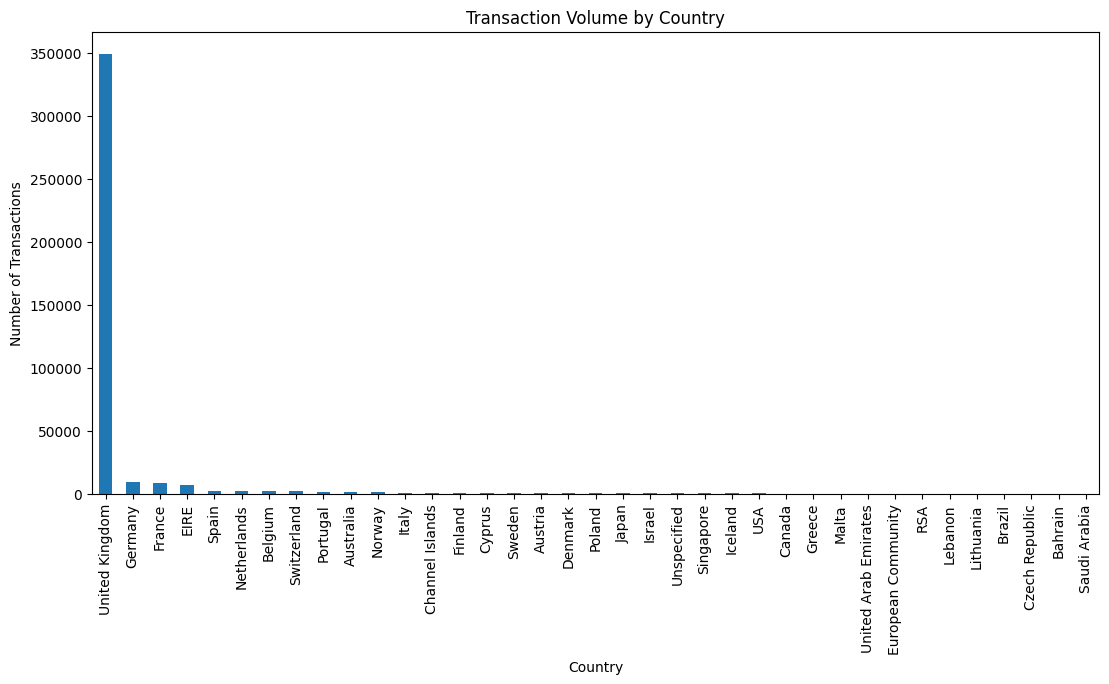

In [25]:
# Transaction volume(count of transaction) vs. Country: Examine how many transactions vary with country.
country_counts = df['Country'].value_counts()
plt.figure(figsize=(13,6))
country_counts = df['Country'].value_counts()
country_counts.plot(kind='bar')
plt.title("Transaction Volume by Country")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)   # rotate labels for readability
plt.show()

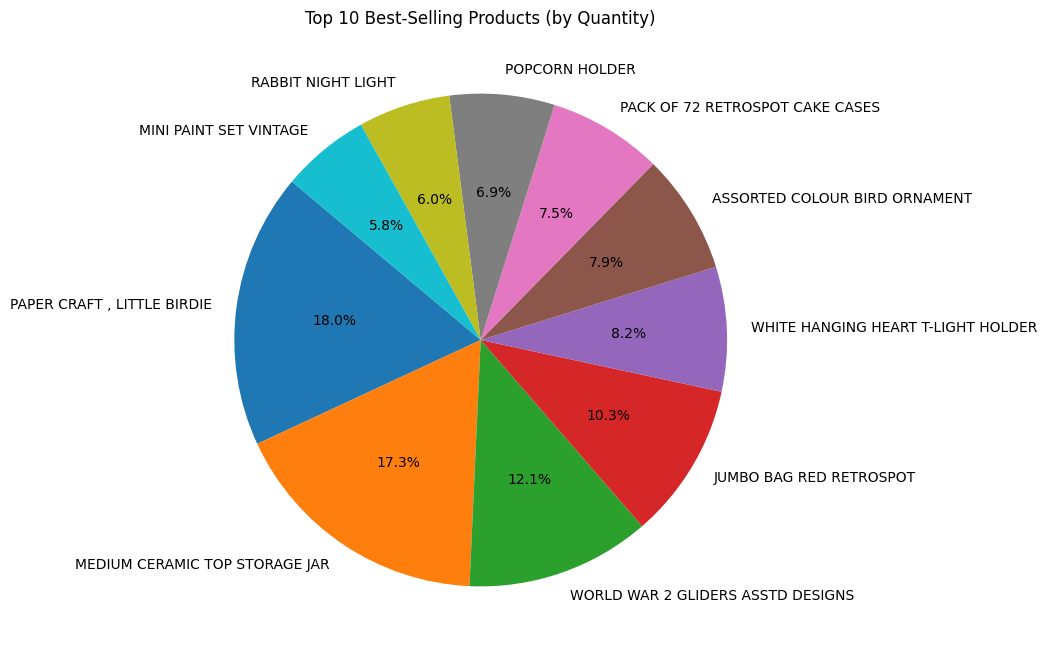

In [26]:
# Visualizing top 10 best selling products
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(top_products_qty, labels=top_products_qty.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Best-Selling Products (by Quantity)")
plt.show()

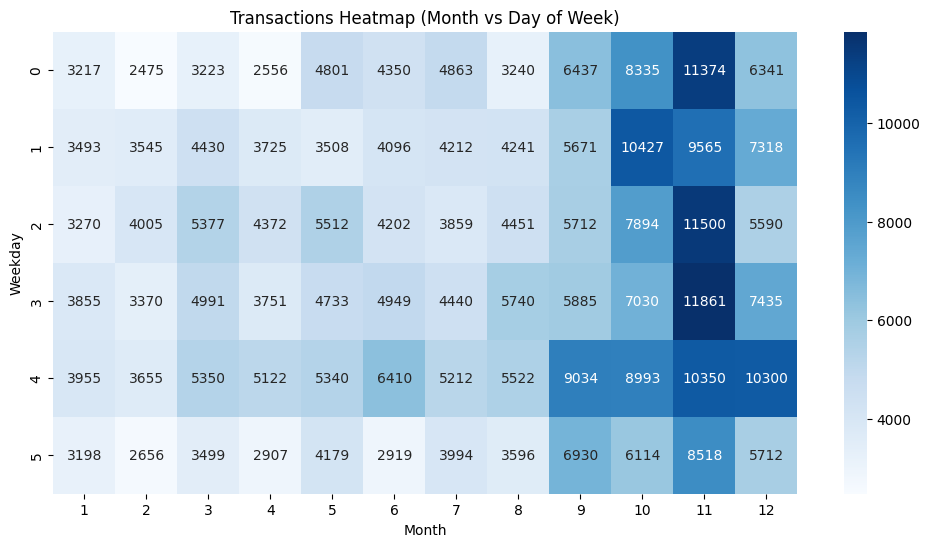

In [27]:
heatmap_data = df.pivot_table(index="Weekday", columns="Month", values="InvoiceNo", aggfunc="count")
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")
plt.title("Transactions Heatmap (Month vs Day of Week)")
plt.show()

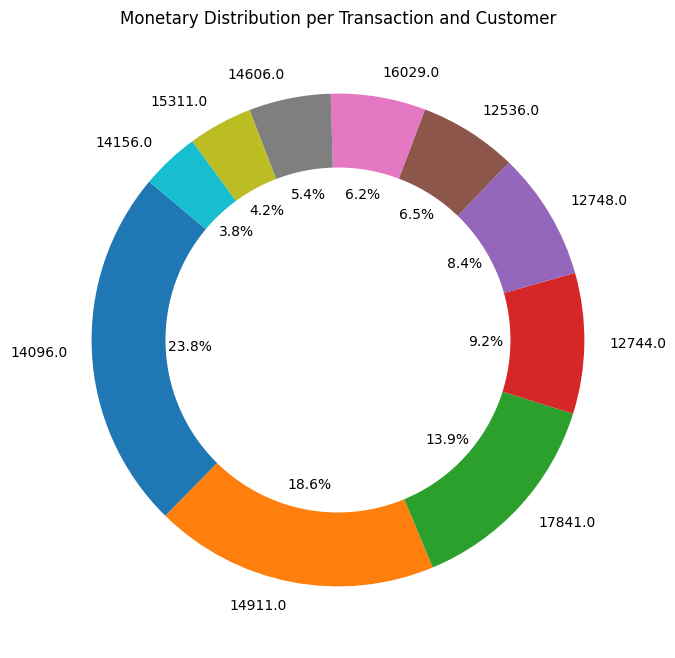

In [28]:
# Visualizing Money transaction by each customer
money_tranc = df.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(money_tranc, labels=money_tranc.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Monetary Distribution per Transaction and Customer")
plt.show()

**As part of feature engineering, created columns for Recency, Frequency, and Monetary (RFM analysis).**

🔹 Definitions

**Recency (R)**:

How recently a customer purchased.

Formula: NOW - LastPurchaseDate (measured in days).

**Frequency (F)**:

How often a customer purchased.

Formula: Count of invoices per customer.

**Monetary (M)**:

How much money a customer spent.

Formula: Sum of (Quantity × UnitPrice) per customer.

In [29]:
# Take the latest date in dataset as reference point
reference_date = df['InvoiceDate'].max()
# Group by CustomerID to calculate R, F, M
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Check result
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2045.53


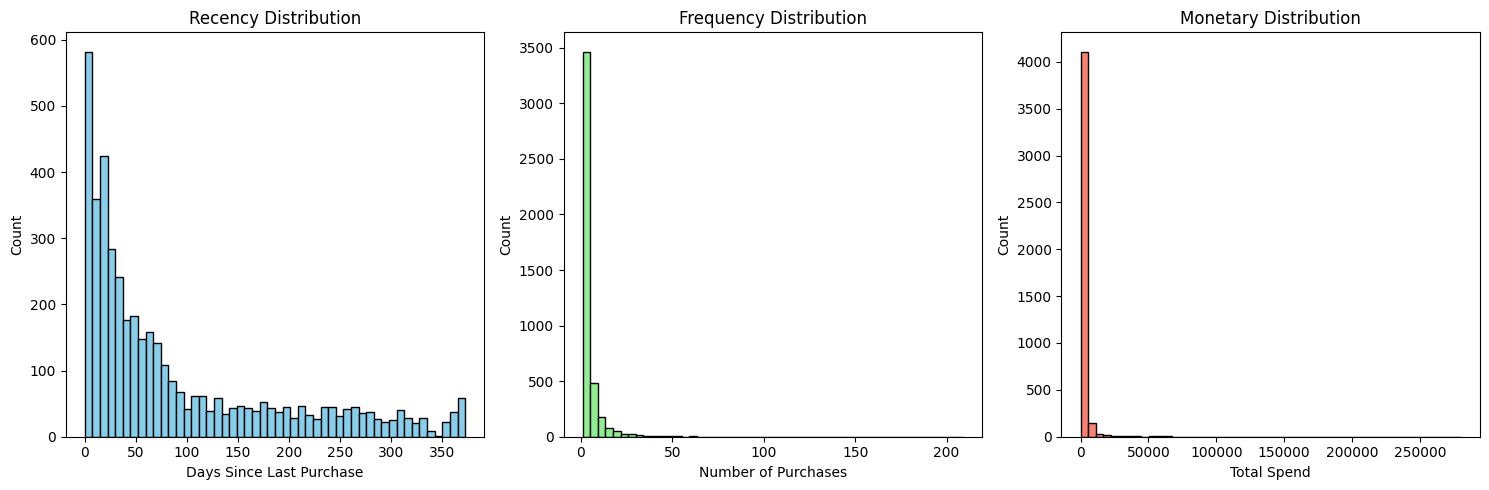

In [30]:
# Visualized the RFM distribution to check if features are normally distributed.
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(rfm['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(rfm['Frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(rfm['Monetary'], bins=50, color='salmon', edgecolor='black')
plt.title("Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [31]:
# Checked the skewness by values
for i in rfm.columns:
  print(i,"Skewness =",rfm[i].skew())

CustomerID Skewness = 0.0009985409909653823
Recency Skewness = 1.2460475158158468
Frequency Skewness = 12.067030826322075
Monetary Skewness = 19.339367981525182


From the above visulaization and skewness value, The values in RFM is Highly Skewed so considering for transformation.

Note: From Data preprocessing steps,

If skewness is inbetween -0.5 to 0.5 which means less skewness and can be neglected.

If skewness is inbetween -1 to -0.5 or 0.5 to 1 which means moderately skewness and can be considered for transmission.

If skewness is inbetween less than -1 or greater than 1 which means highly skewness and advisable to considered for transmission.(If data in column is high then transormation is highly recommended. If data in column is low then transformation can be ignored)

In [32]:
# Checked the kurtosis by values
for i in rfm.columns:
  print(i,"Kurtosis =",rfm[i].kurtosis())

CustomerID Kurtosis = -1.195338067378044
Recency Kurtosis = 0.4305762982496799
Frequency Kurtosis = 249.05812320006066
Monetary Kurtosis = 478.68428853545845


From the above visualization and kurtosis values, the RFM features were found to be highly kurtotic, so transformation was considered.

**Note (Data Preprocessing Guidelines)**:

**Case 1:** If kurtosis is between -3 and 3, it indicates low kurtosis and can be ignored.

**Case 2:** If kurtosis is between -6 to -3 or 3 to 6, it indicates moderate kurtosis and may be considered for transformation.

**Case 3:** If kurtosis is less than -6 or greater than 6, it indicates high kurtosis and transformation is advisable.

From the above analysis, it was concluded that RFM has high skewness and kurtosis, so the Box-Cox/Yeo-Johnson method was planned to handle it.

In [33]:
# Checked if any 0 or negative values present in RFM
rfm[(rfm['Recency'] < 1) | (rfm['Frequency'] < 1) | (rfm['Monetary'] < 1)]

,CustomerID,Recency,Frequency,Monetary
61,12423.0,0,8,1859.31
71,12433.0,0,7,13375.87
137,12518.0,0,5,2056.89
144,12526.0,0,3,1316.66
258,12662.0,0,11,3849.78
...,...,...,...,...
3894,17675.0,0,31,20374.28
3954,17754.0,0,5,1664.65
3955,17757.0,0,30,5593.39
4093,17949.0,0,45,58510.48


In [34]:
# 93 rows had 0/negative RFM values; set option to display all values
pd.set_option('display.max_rows', None)
rfm[(rfm['Recency'] < 1) | (rfm['Frequency'] < 1) | (rfm['Monetary'] < 1)]

,CustomerID,Recency,Frequency,Monetary
61,12423.0,0,8,1859.31
71,12433.0,0,7,13375.87
137,12518.0,0,5,2056.89
144,12526.0,0,3,1316.66
258,12662.0,0,11,3849.78
271,12680.0,0,4,862.81
297,12713.0,0,1,848.55
326,12748.0,0,209,33053.19
471,12955.0,0,11,4757.16
489,12985.0,0,2,1239.38


From the above analysis, we found that only Recency contains zero values, so the Yeo-Johnson method was chosen since Box-Cox is suitable only for positive values.

Standardized the RFM values by first handling outliers and skewness. The processed RFM values were then transformed using the StandardScaler method to ensure all features contribute equally to clustering.

In [35]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Transforation using Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
rfm_transformed = pt.fit_transform(rfm[['Recency','Frequency','Monetary']])

# Standard scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_transformed)

In [36]:
# Converted scaled RFM into data frame after transformation
rfm_scaled_df = pd.DataFrame(
    rfm_scaled,
    columns=['Recency', 'Frequency', 'Monetary'],
    index=rfm.index   # keep same index (CustomerID if not reset)
)
# Check result
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,1.624870,-1.158367,3.124061
1,-1.841636,1.202090,1.378940
2,0.291210,0.660807,0.755356
3,-0.679354,-1.158367,0.738795
4,1.573275,-1.158367,-0.587198


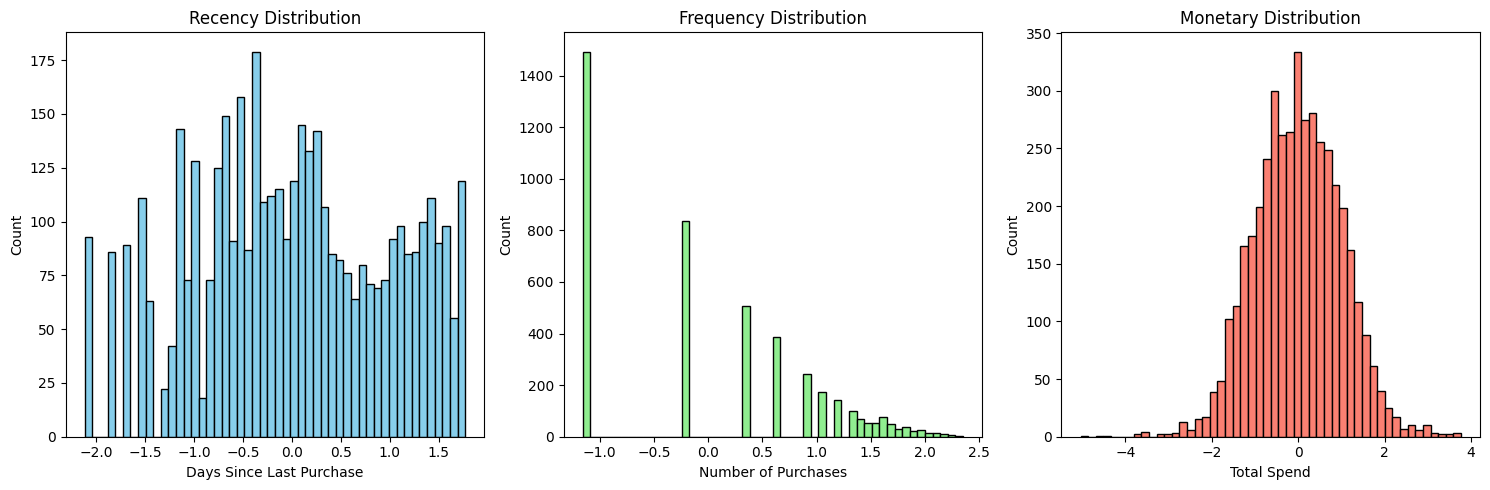

In [37]:
# Visualized the RFM distribution after the transformations to ensure these features are normally distributed.
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(rfm_scaled_df['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(rfm_scaled_df['Frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(rfm_scaled_df['Monetary'], bins=50, color='salmon', edgecolor='black')
plt.title("Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [38]:
# Checked the skewness by values
for i in rfm_scaled_df.columns:
  print(i,"Skewness =",rfm_scaled_df[i].skew())

Recency Skewness = -0.07040207530050807
Frequency Skewness = 0.21662676878724474
Monetary Skewness = -0.014303410121971272


Hence, the skewness in RFM was reduced after transformation, bringing it within the acceptable limit for data processing.

In [39]:
# Checked the kurtosis by values
for i in rfm_scaled_df.columns:
  print(i,"Kurtosis =",rfm_scaled_df[i].kurtosis())

Recency Kurtosis = -0.845885622417228
Frequency Kurtosis = -1.2059293505217434
Monetary Kurtosis = 0.42046109200952264


Hence, the kurtosis in RFM was reduced after transformation, bringing it within the acceptable limit for data processing.

In [40]:
# Built a model using KMeans to test K values ranging from 2 to 11 (10 values) and printed the Silhouette score as the evaluation metric.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []  # Within-cluster sum of squares
for i in range(2,11):
  model = KMeans(n_clusters = i).fit(rfm_scaled_df.iloc[:,:-1])
  wcss.append(model.inertia_)
  labels = model.fit_predict(rfm_scaled_df.iloc[:,:-1])
  score = silhouette_score(rfm_scaled_df.iloc[:,:-1], labels)
  print(f"For k={i}, Silhouette Score = {score:.3f}")

For k=2, Silhouette Score = 0.469
For k=3, Silhouette Score = 0.414
For k=4, Silhouette Score = 0.423
For k=5, Silhouette Score = 0.396
For k=6, Silhouette Score = 0.450
For k=7, Silhouette Score = 0.435
For k=8, Silhouette Score = 0.445
For k=9, Silhouette Score = 0.458
For k=10, Silhouette Score = 0.443


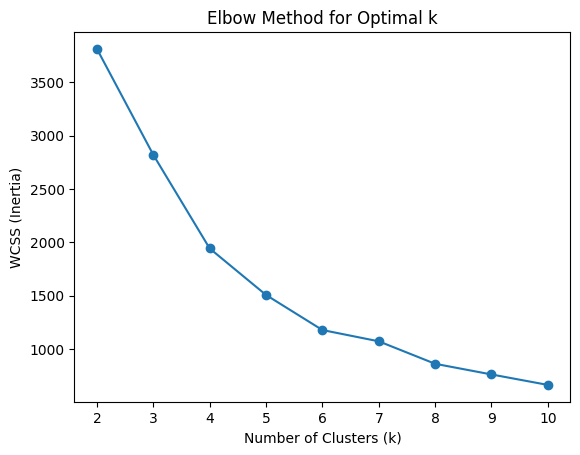

In [41]:
# Visualized inertia using the Elbow Method to determine the optimal number of clusters.
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

From the above observation of the Elbow Method and Silhouette score, the optimal K value was concluded to be 4. This K value was then used in the KMeans algorithm to identify clusters.

In [42]:
# Applied KMeans with K=4 and added cluster labels
model1 = KMeans(n_clusters = 4).fit(rfm_scaled_df)
cluster = model1.predict(rfm_scaled_df)
rfm_scaled_df["Cluster"]= cluster
rfm_scaled_df.head()

,Recency,Frequency,Monetary,Cluster
0,1.624870,-1.158367,3.124061,2
1,-1.841636,1.202090,1.378940,1
2,0.291210,0.660807,0.755356,2
3,-0.679354,-1.158367,0.738795,3
4,1.573275,-1.158367,-0.587198,0


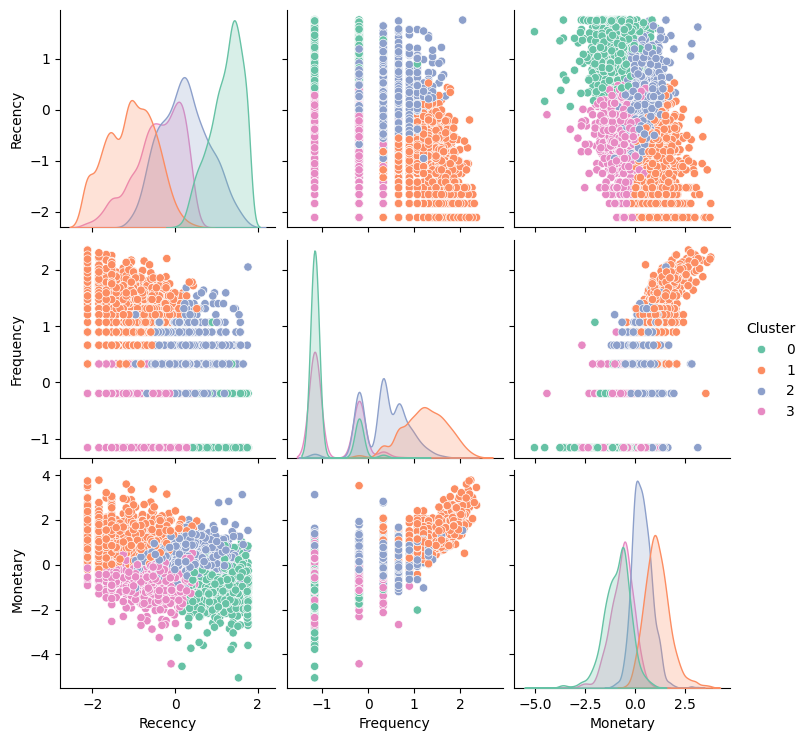

In [43]:
# Pairplot of clusters to have 3D insight on transformed RFM
sns.pairplot(rfm_scaled_df, hue="Cluster", diag_kind="kde", palette="Set2")
plt.show()

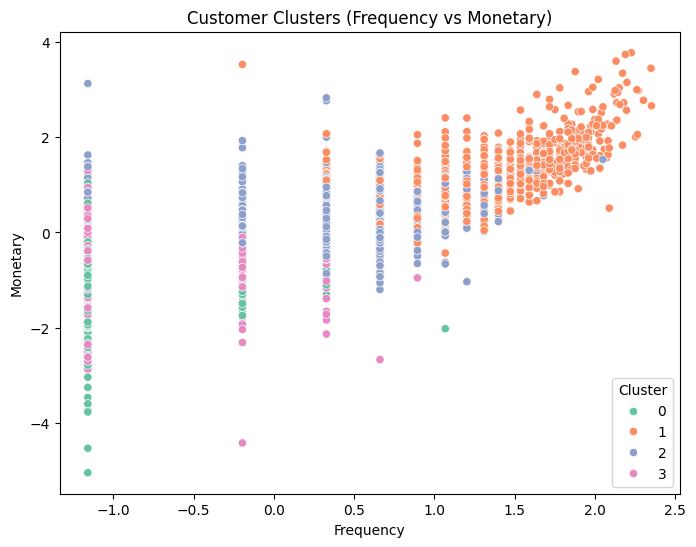

In [44]:
# 2D Scatter: Frequency vs Monetary for transformed RFM
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm_scaled_df, x="Frequency", y="Monetary", hue="Cluster", palette="Set2")
plt.title("Customer Clusters (Frequency vs Monetary)")
plt.show()

In [45]:
# Averaged Recency, Frequency, and Monetary values with respect to clusters for labeling.
cluster_profile = rfm_scaled_df.groupby('Cluster')[["Recency","Frequency","Monetary"]].mean().round(2)
cluster_profile

,Recency,Frequency,Monetary
Cluster,,,
0,1.23,-0.99,-0.92
1,-1.08,1.23,1.10
2,0.23,0.36,0.33
3,-0.41,-0.78,-0.67


**Labeled the clusters by interpreting their RFM averages**:

* High-Value → Low Recency, High Frequency and High Monetary

* At Risk → High Recency, Low Frequency and High Monetary

* Regular → Moderate Recency, Frequency, and Monetary

* Occasional → High Recency, Low Frequency and Low Monetary

In [47]:
# Mapped cluster labels into segments based on the averaged Recency, Frequency, and Monetary values.
cluster_labels = {
    0: "Occasional",
    1: "High-Value",
    2: "Regular",
    3: "At Risk"
}
rfm_scaled_df["Segment"] = rfm_scaled_df["Cluster"].map(cluster_labels)
rfm_scaled_df.head()

,Recency,Frequency,Monetary,Cluster,Segment
0,1.624870,-1.158367,3.124061,2,Regular
1,-1.841636,1.202090,1.378940,1,High-Value
2,0.291210,0.660807,0.755356,2,Regular
3,-0.679354,-1.158367,0.738795,3,At Risk
4,1.573275,-1.158367,-0.587198,0,Occasional


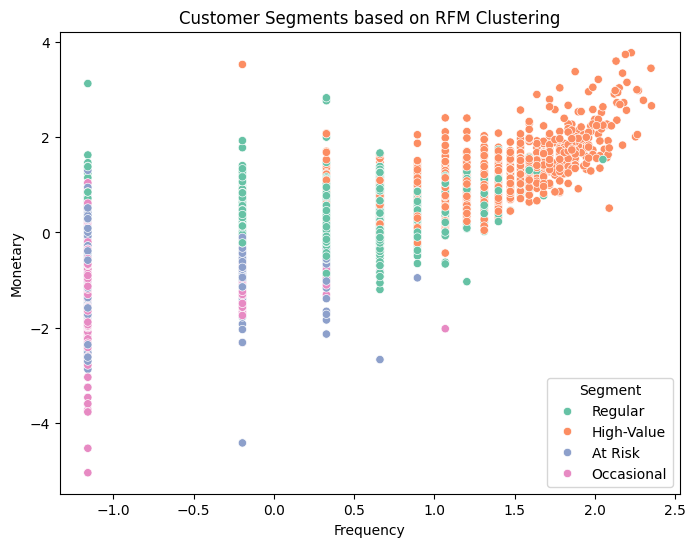

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm_scaled_df, x="Frequency", y="Monetary", hue="Segment", palette="Set2")
plt.title("Customer Segments based on RFM Clustering")
plt.show()

In [49]:
# Converted the model into byte stream(binary) form using pickling
import pickle
pickle.dump(model1,open("Shoppe.pkl","wb"))

In [50]:
# Loading of pickled file for making the prediction using selected model
with open('Shoppe.pkl', 'rb') as file:
     brain = pickle.load(file)

In [51]:
import numpy as np
suhail = np.array([[-0.679354,-1.158367,0.738795]])
brain.predict(suhail)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [52]:
def predict_segment_from_df(recency, frequency, monetary):
    input_data = pd.DataFrame([[recency, frequency, monetary]],
                              columns=["Recency", "Frequency", "Monetary"])
    cluster = brain.predict(input_data)[0]
    segment = cluster_labels.get(cluster, "Unknown")
    return cluster, segment

In [53]:
predict_segment_from_df(20,10,10)

(np.int32(2), 'Regular')

**Recommendation System Approach:**
We need a matrix where,

* Rows = Customers (CustomerID)

* Columns = Products (StockCode)

* Values = Purchase counts (or 1 if purchased).

In [54]:
# Built Customer-Item matrix (rows=CustomerID, cols=Description, values=Quantity)
customer_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

In [55]:
# Set option to display only 10 values
pd.set_option('display.max_rows', 10)

In [56]:
# Checked the result of Customer-Item matrix as pivot table
customer_item_matrix

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Computed Cosine Similarity between Items(columns of the matrix)
from sklearn.metrics.pairwise import cosine_similarity

# Transpose so items are rows
item_similarity = cosine_similarity(customer_item_matrix.T)

# Convert to DataFrame for easier lookup
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=customer_item_matrix.columns,
    columns=customer_item_matrix.columns
)

In [58]:
# Checking on how item_similarity_df is formed.
item_similarity_df

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,1.000000,0.030829,0.005989,0.001467,0.000000,0.021649,0.016655,0.558159,0.036699,0.013976,...,0.000000,0.003133,0.024645,0.302236,0.016603,0.462700,0.003389,0.721928,0.000000,0.000000
12 COLOURED PARTY BALLOONS,0.030829,1.000000,0.049282,0.057428,0.007737,0.006321,0.059429,0.030706,0.020101,0.008785,...,0.000000,0.003717,0.016945,0.025296,0.000000,0.027983,0.000000,0.035871,0.000000,0.018714
12 DAISY PEGS IN WOOD BOX,0.005989,0.049282,1.000000,0.490186,0.000000,0.103634,0.056399,0.050523,0.016043,0.008428,...,0.000000,0.001326,0.060435,0.078458,0.000000,0.056453,0.000000,0.046778,0.001474,0.162689
12 EGG HOUSE PAINTED WOOD,0.001467,0.057428,0.490186,1.000000,0.000000,0.039582,0.067720,0.068734,0.020805,0.000953,...,0.000000,0.006960,0.091329,0.113126,0.000000,0.077150,0.065874,0.071497,0.030950,0.232180
12 HANGING EGGS HAND PAINTED,0.000000,0.007737,0.000000,0.000000,1.000000,0.000000,0.005010,0.000249,0.000916,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,0.462700,0.027983,0.056453,0.077150,0.000000,0.043631,0.012205,0.327979,0.017511,0.006915,...,0.014745,0.009773,0.108995,0.585205,0.020853,1.000000,0.006385,0.483933,0.002333,0.133134
ZINC TOP 2 DOOR WOODEN SHELF,0.003389,0.000000,0.000000,0.065874,0.000000,0.209651,0.000000,0.008202,0.010473,0.001114,...,0.000000,0.000000,0.013708,0.025044,0.000000,0.006385,1.000000,0.013216,0.000000,0.000000
ZINC WILLIE WINKIE CANDLE STICK,0.721928,0.035871,0.046778,0.071497,0.000000,0.016947,0.011330,0.505713,0.011152,0.004571,...,0.000000,0.023041,0.028676,0.324531,0.000000,0.483933,0.013216,1.000000,0.006986,0.024610


In [59]:
# Saved the item_similarity_df into byte stream(binary) form using pickling
item_similarity_df.to_pickle("item_similarity.pkl")

In [60]:
# Created function to return the top 5 most similar items by their Description.
def get_similar_products(product, top_n=5):
    # Get similarity scores
    similar_scores = item_similarity_df[product].sort_values(ascending=False)
    # Exclude the product itself
    similar_scores = similar_scores.drop(product)
    return similar_scores.head(top_n)

In [61]:
# Checked the result of function by giving sample Product
get_similar_products('12 IVORY ROSE PEG PLACE SETTINGS', top_n=5)

,12 IVORY ROSE PEG PLACE SETTINGS
Description,
"WALL ART,ONLY ONE PERSON",0.544690
PLAYING CARDS VINTAGE DOILEY,0.542809
PORCELAIN ROSE SMALL,0.530936
PORCELAIN ROSE LARGE,0.529111
SILVER HANGING T-LIGHT HOLDER,0.523435


In [62]:
!pip install streamlit streamlit_option_menu # installation of streamlit for data visualization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.3 MB/s eta 0:00:00


In [63]:
!pip install pyngrok

In [64]:
from pyngrok import ngrok
ngrok.set_auth_token("31b0GFSDQJdb3qvFwy3aIhzPsK9_6J68bQWQVk4qUZDd7XuwC")

In [65]:
tunnel = ngrok.connect(8501, "http")
print("Streamlit URL:", tunnel.public_url)

Streamlit URL: https://15f2aa6fe70f.ngrok-free.app


In [68]:
# ---------- Streamlit UI ----------
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
brain = pickle.load(open('Shoppe.pkl', 'rb'))
item_similarity_df = pd.read_pickle("item_similarity.pkl")

# ---------- Define cluster -> segment mapping ----------
cluster_labels = {
    0: "Occasional",
    1: "High-Value",
    2: "Regular",
    3: "At Risk"
}

# ---------- Function -> Segment Prediction ----------
def predict_segment_from_df(recency, frequency, monetary):
    input_data = pd.DataFrame([[recency, frequency, monetary]],
                              columns=["Recency", "Frequency", "Monetary"])
    cluster = brain.predict(input_data)[0]
    segment = cluster_labels.get(cluster, "Unknown")
    return cluster, segment

# ---------- Function -> Product Recommendation ----------
def get_similar_products(product, top_n=5):
    # Check if product exists in similarity matrix
    if product not in item_similarity_df.columns:
        return None
    # Get similarity scores
    similar_scores = item_similarity_df[product].sort_values(ascending=False)
    # Exclude the product itself
    similar_scores = similar_scores.drop(product)
    return similar_scores.head(top_n)

st.sidebar.title("🛍️📊 Shopper Spectrum")
st.sidebar.divider()
menu = st.sidebar.radio("Navigate",("Clustering", "Recommendation"))
if menu == "Recommendation":
  st.title("🛒 Product Recommendation System")
  st.write("Item-based Collaborative Filtering using purchase history")

  # Search box
  search_product = st.text_input("Enter a product name:")
  button = st.button("Recommend")
  if button:
    if search_product:
        results = get_similar_products(search_product, top_n=5)
        if results is None:
          st.warning("⚠️ No matching product found. Try a different name.")
        else:
            st.subheader("Top 5 Similar Products:")
            for desc in results.index:
                st.write(f"- {desc}")
elif menu == "Clustering":
  st.title("👥📊 Customer Segmentation")
  st.write("Enter Recency, Frequency and Monetary values to predict the customer's cluster and segment")
  # Input fields
  recency = st.number_input("Recency (days since last purchase)", min_value=0, max_value=1000, value=0)
  frequency = st.number_input("Frequency (number of purchases)", min_value=0, max_value=500, value=0)
  monetary = st.number_input("Monetary (total spend)", min_value=0.0, max_value=100000.0, value=0.0, step=10.0)
  if st.button("Predict Segment"):
    cluster, segment = predict_segment_from_df(recency, frequency, monetary)
    st.success(f"🧩 Predicted Cluster: **{cluster}**")
    st.success(f"🎯 Predicted Segment: **{segment}**")

Overwriting app.py


In [69]:
!streamlit run app.py --server.port 8501 &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.10.150.129:8501

  Stopping...
